In [1]:
# Labels are:
# 0 - Angry
# 1 - Disgust
# 2 - Fear
# 3 - Happy
# 4 - Sad
# 5 - Surprise
# 6 - Neutral

import math, random
import pandas as pd
#from sklearn.datasets import load_files
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append(".")
from Clustering import *
from ImageData import *

In [2]:
# Load Data

train_folder = "data/train/"
X_train, y_train =Load_Image_Dataset(train_folder)

test_folder = "data/test/"
X_test, y_test =Load_Image_Dataset(test_folder)

#val_folder = "fulldata/val/"
#val_img_data, val_class_id =create_dataset(val_folder)

In [3]:
# Get training Images Features 
AllFeatures = extractfeatures(X_train)

print('Shape : ',AllFeatures[0].shape)
print('Unique Labels : ', np.unique(y_train))

Shape :  (2304,)
Unique Labels :  [3 4 6]


Original number of features :  (14330, 2304)
Reduced number of features :  (14330, 9)


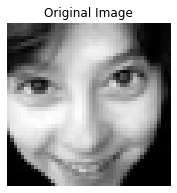

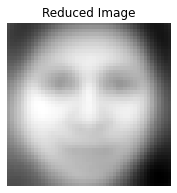

In [4]:
# Perform Feature Reduction
X = AllFeatures.copy()
X = PCA_FeatureReduction(X ,9 , X_train)

In [5]:
X.shape

(14330, 9)

inertias :  [85179516176.20146, 61337713592.210205, 54328827535.61743, 49443511587.454575, 45899137203.84326, 43503257045.79111, 41826854330.89282, 40234509992.85102, 38834390459.55267]


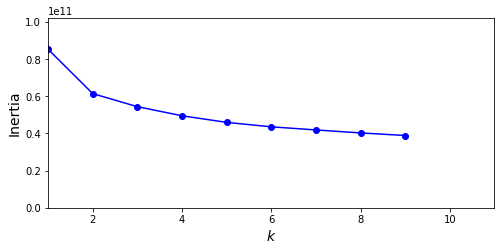

In [6]:
clusterer = KMeansClass()
clusterer.inertia_vs_k_plot(X,K_range=10)

# Calculate Silhouette score to evaluate the quality of clusters created for different K

In [7]:

clusterer = KMeansClass(2)
clusterer.train(X)
S = clusterer.Calculate_Silhoutte_Score(X,clusterer.means , _metric='euclidean')
print(" for K = 2 , Silhoutte_Score = {} ".format(S))

clusterer = KMeansClass(3)
clusterer.train(X)
S = clusterer.Calculate_Silhoutte_Score(X,clusterer.means , _metric='euclidean')
print(" for K = 3 , Silhoutte_Score = {} ".format(S))

clusterer = KMeansClass(4)
clusterer.train(X)
S = clusterer.Calculate_Silhoutte_Score(X,clusterer.means , _metric='euclidean')
print(" for K = 4 , Silhoutte_Score = {} ".format(S))

clusterer = KMeansClass(5)
clusterer.train(X)
S = clusterer.Calculate_Silhoutte_Score(X,clusterer.means , _metric='euclidean')
print(" for K = 5 , Silhoutte_Score = {} ".format(S))


C:\Users\jads\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Cluster Means Shape :  (2, 9)
 for K = 2 , Silhoutte_Score = 0.23573081498833454 


C:\Users\jads\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Cluster Means Shape :  (3, 9)


KeyboardInterrupt: 

In [ ]:
'''
!conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    ##Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
'''

"\n!conda install -c districtdatalabs yellowbrick\nfrom yellowbrick.cluster import SilhouetteVisualizer\n\nfig, ax = plt.subplots(2, 2, figsize=(15,8))\nfor i in [2, 3, 4, 5]:\n    ##Create KMeans instance for different number of clusters\n    \n    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)\n    q, mod = divmod(i, 2)\n    \n    #Create SilhouetteVisualizer instance with KMeans instance\n    #Fit the visualizer\n    \n    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])\n    visualizer.fit(X)\n"

# Plot All Features and centroids Graphs

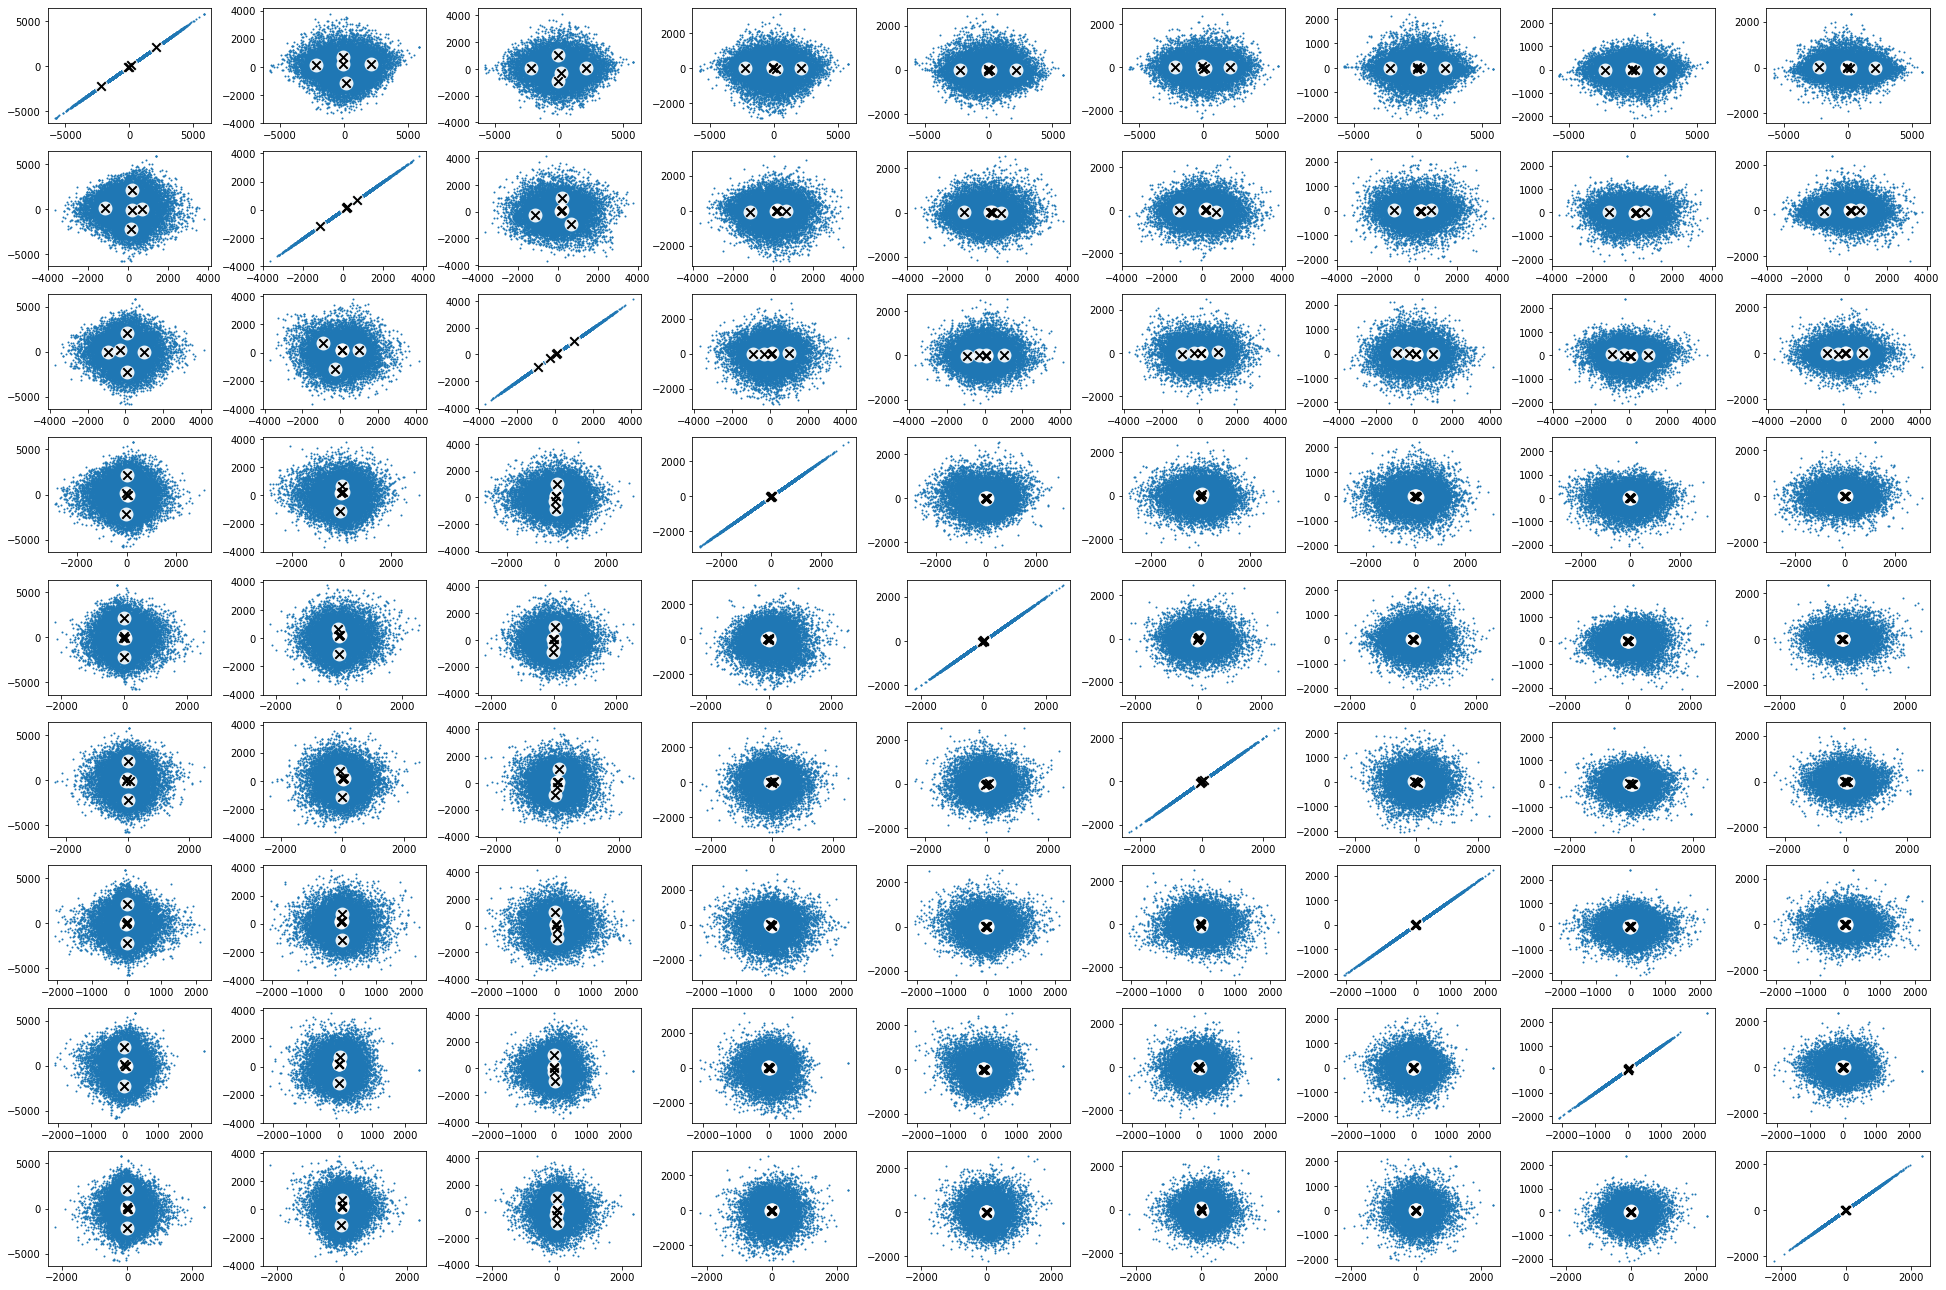

In [ ]:
clusterer.plot_Box_Features_Centroids(clusterer , X )

In [ ]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):

    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
data = X.copy()
labels = y_train.copy()
n_digits = 9
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	1.090s	87796	0.011	0.006	0.008	0.005	0.007	0.045
random   	1.096s	87701	0.011	0.006	0.007	0.005	0.007	0.054
PCA-based	0.288s	87913	0.012	0.006	0.008	0.005	0.008	0.044
__________________________________________________________________________________


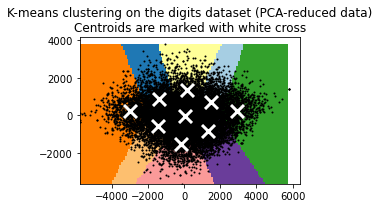

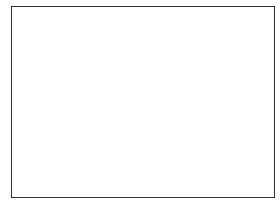

In [ ]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 100  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.figure(figsize=(4,3))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
clusterer = KMeansClass(2)
clusterer.train(list(X))
print(clusterer.means)

C:\Users\jads\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


Cluster Means Shape :  (2, 9)
KMeans(n_clusters=2, n_jobs=-1, random_state=42)


In [ ]:
'''
for i in range(1,4):
    j= random.randrange(1,X.shape[1])
    k= random.randrange(1,X.shape[1])
    print("feature 1 ID = {}, feature 2 ID = {} ".format(j,k))
    
    clusterer._plt.figure(figsize=(4, 3))
    clusterer.plot_clusters(X, y=None, feature1=j,feature2=k)
    clusterer.plot_centroids(X, feature1=j,feature2=k)
    clusterer._plt.show()

'''

## prediction for 3 Clusters which we have in our images lists

In [ ]:
import sklearn
_kmeans = KMeans(n_clusters=3,n_jobs=-1, random_state=22)
_kmeans.fit(X)
print(_kmeans.cluster_centers_.shape)

C:\Users\jads\Anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


(3, 9)


Original number of features :  (2099, 2304)
Reduced number of features :  (2099, 9)


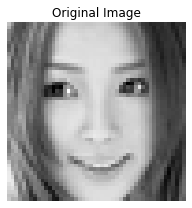

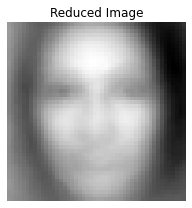

'\nfrom sklearn.metrics import confusion_matrix\nprint(confusion_matrix(y_test, y_pred), ": is the confusion matrix")\nfrom sklearn.metrics import accuracy_score\nprint(accuracy_score(y_test, y_pred), ": is the accuracy score")\nfrom sklearn.metrics import precision_score\nprint(precision_score(y_test, y_pred,average=\'weighted\'), ": is the precision score")  #None, \'micro\', \'macro\', \'weighted\', \'samples\'\nfrom sklearn.metrics import recall_score\nprint(recall_score(y_test, y_pred,average=\'weighted\'), ": is the recall score")\nfrom sklearn.metrics import f1_score\nprint(f1_score(y_test, y_pred,average=\'weighted\'), ": is the f1 score")\n'

In [ ]:

x_test = extractfeatures(X_test)
x_test = PCA_FeatureReduction(x_test,9,X_train)
y_pred = _kmeans.predict(x_test)
'''
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred,average='weighted'), ": is the precision score")  #None, 'micro', 'macro', 'weighted', 'samples'
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred,average='weighted'), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred,average='weighted'), ": is the f1 score")
'''


 Cluster 0 contains : 
1911


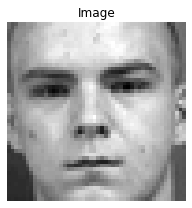

2025


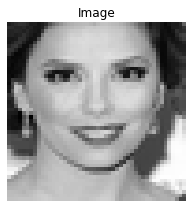

210


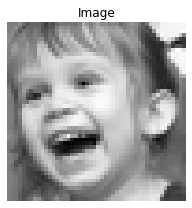

1167


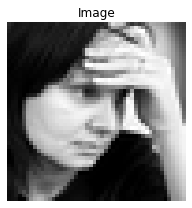

1006


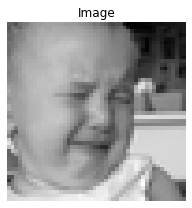

 Cluster 1 contains : 
902


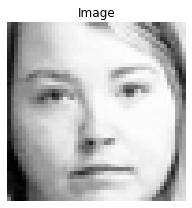

1572


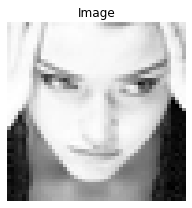

1354


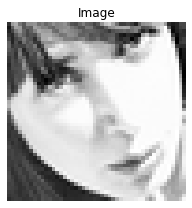

19


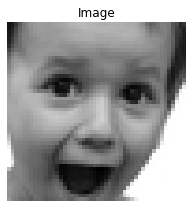

295


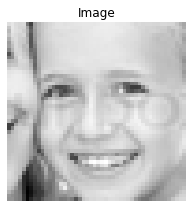

 Cluster 2 contains : 
1412


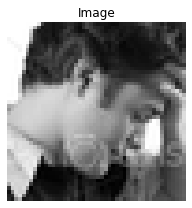

2085


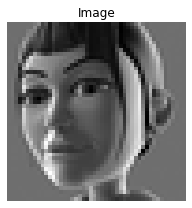

535


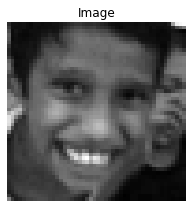

1583


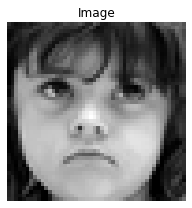

1570


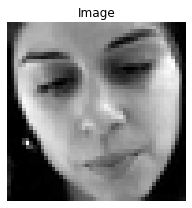

In [ ]:
# Show images in clusters
for i in range(0,3):
    result = np.where(y_pred == i)
    print(" Cluster {} contains : ".format(i))
    for j in range(0,5):
        r = random.randrange(0,len(result[0]))
        print(result[0][r])
        show_image(X_test[result[0][r]])



# Gaussian Mixture

In [ ]:
#Backup X
Xtemp= X.copy()

In [ ]:
X = Xtemp.copy()
#Only 2 Columns !!!!!!!!!!!!!!! we cannot use more if we want to Plot them
X = X[:,:2]

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)

gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
print(" Gaussian Means Shape " ,gm.means_.shape)
print(" Gaussian Means  " ,gm.means_)
print(" Gaussian covariances_ " ,gm.covariances_)
print(" converged_ ? " ,gm.converged_)
print(" after how many iterations ? " ,gm.n_iter_)

 Gaussian Means Shape  (3, 2)
 Gaussian Means   [[ 1702.27395038   150.85533291]
 [-1754.8615367    154.60668895]
 [   41.22153723  -187.16008926]]
 Gaussian covariances_  [[[1027854.76050706   83486.62064515]
  [  83486.62064515  739024.37760985]]

 [[1112749.26532828  -34063.55577235]
  [ -34063.55577235  667767.85931139]]

 [[ 763656.76003291  -11990.41024378]
  [ -11990.41024378 1114347.53091685]]]
 converged_ ?  True
 after how many iterations ?  8


In [ ]:

gm.predict(X)

array([1, 2, 2, ..., 1, 0, 1], dtype=int64)

In [ ]:
gm.predict_proba(X)

array([[0.00308651, 0.81946964, 0.17744385],
       [0.04914003, 0.26608579, 0.68477419],
       [0.11400645, 0.1310453 , 0.75494826],
       ...,
       [0.01612922, 0.53153947, 0.45233131],
       [0.71673404, 0.00665631, 0.27660965],
       [0.00321079, 0.80155928, 0.19522992]])

## Scoring Samples

In [ ]:
gm.score_samples(X)

array([-16.59439879, -16.74611628, -16.10380725, ..., -16.38503135,
       -17.00495648, -16.86443703])

In [ ]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T
pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

4.0494379723195306e-05

## Plotting the boundaries

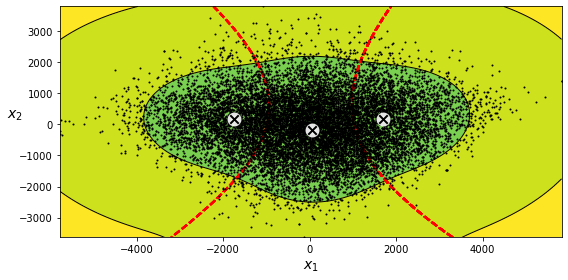

In [ ]:
from matplotlib.colors import LogNorm

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
                
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

In [ ]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

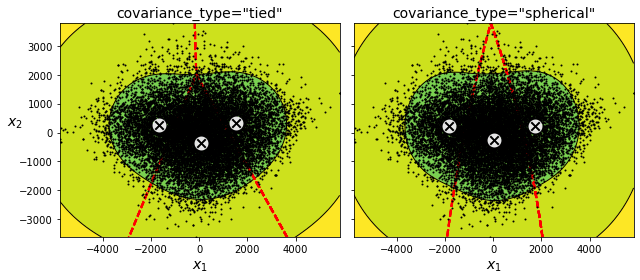

In [ ]:

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

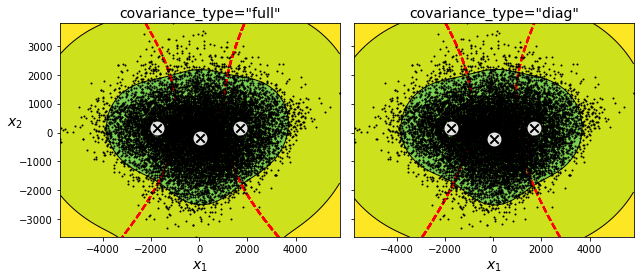

In [ ]:

compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()